In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from FairnessEvaluator import FairnessEvaluator

import matplotlib.pyplot as plt 

In [2]:
students_df_raw = pd.read_csv('data/portuguese_students_data.csv',delimiter=',')
students_df = students_df_raw.copy()

# Pre-processing: make target, code sex, address, parents education
students_df['label_value'] = students_df['G3'].apply(lambda x: 1 if x < 10 else 0)
students_df['sex'] = students_df['sex'].apply(lambda x: 1 if x == 'F' else 0)
students_df['address'] = students_df['address'].apply(lambda x: 1 if x == 'R' else 0)

# Mapping for Education
# 1: Other
# 2: High school
# 3: University or greater
students_df['parents_education'] = students_df.apply(lambda row: max(row.Medu,row.Fedu), axis=1)

# From the Portuguese students dataset:
# (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)

students_education_recoder = {
    0: 0,
    1: 0,
    2: 0,
    3: 1,
    4: 2,
}

students_df['parents_education'] = students_df['parents_education'].map(students_education_recoder)

print(students_df.shape)
students_df.head()

(1044, 37)


,ID,Subject,school,sex,age,address,famsize,Pstatus,Medu,Fedu,...,goout,Dalc,Walc,health,absences,G1,G2,G3,label_value,parents_education
0,100097,Por,GP,1,16,0,GT3,A,3,4,...,1,1,4,5,12,15,13,14,0,2
1,101021,Por,GP,1,17,0,GT3,T,3,2,...,4,1,3,3,2,17,18,17,0,1
2,102965,Por,GP,0,16,0,LE3,T,1,2,...,5,3,5,5,0,9,8,10,0,0
3,102989,Por,MS,0,17,0,GT3,T,2,3,...,3,1,1,3,4,14,15,16,0,1
4,103131,Por,GP,1,16,0,GT3,T,1,1,...,2,1,4,5,2,12,13,13,0,0


In [3]:
loans_df_raw = pd.read_csv('data/taiwanese_loan_assessment.csv',delimiter=',')
loans_df = loans_df_raw.copy()
loans_df['sex'] = loans_df['SEX'].apply(lambda x: 1 if x == 2 else 0)

# Mapping for Education
# 1: Other
# 2: High school
# 3: University or greater
loans_df['education'] = loans_df['EDUCATION']

# From the dataset description:
# Education (1 = graduate school; 2 = university; 3 = high school; 4 = others)

loans_education_recoder = {
    1: 2,
    2: 2,
    3: 1,
    4: 0,
}

loans_df['education'] = loans_df['education'].map(loans_education_recoder)
loans_df['education'] = loans_df['education'].fillna(0)

loans_df['label_value'] = loans_df['default payment next month']

print(loans_df.shape)
loans_df.head()

(30000, 28)


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,sex,education,label_value
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,689,0,0,0,0,1,1,2.0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,0,1000,1000,1000,0,2000,1,1,2.0,1
2,3,90000,2,2,2,34,0,0,0,0,...,1518,1500,1000,1000,1000,5000,0,1,2.0,0
3,4,50000,2,2,1,37,0,0,0,0,...,2000,2019,1200,1100,1069,1000,0,1,2.0,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,2000,36681,10000,9000,689,679,0,0,2.0,0


In [4]:
diabetes_df_raw = pd.read_csv('data/diabetes_data_upload.csv',delimiter=',')
diabetes_df = diabetes_df_raw.copy()

# Pre-processing: make target, code sex, address, parents education
diabetes_df['label_value'] = diabetes_df['class'].apply(lambda x: 1 if x == 'Positive' else 0)
diabetes_df['sex'] = diabetes_df['Gender'].apply(lambda x: 1 if x == 'Female' else 0)

print(diabetes_df.shape)
diabetes_df.head()

(520, 19)


,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class,label_value,sex
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive,1,0
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive,1,0
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive,1,0
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive,1,0
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive,1,0


DEBUG: Working on df=loans, attr=education


/opt/miniconda3/lib/python3.9/site-packages/FairnessEvaluator/evaluator.py:305: RuntimeWarning: divide by zero encountered in double_scalars
  metric_disparity[v] = metric[v] / metric[self.reference_groups[attr]]
/opt/miniconda3/lib/python3.9/site-packages/FairnessEvaluator/evaluator.py:305: RuntimeWarning: divide by zero encountered in double_scalars
  metric_disparity[v] = metric[v] / metric[self.reference_groups[attr]]
/opt/miniconda3/lib/python3.9/site-packages/FairnessEvaluator/evaluator.py:305: RuntimeWarning: divide by zero encountered in double_scalars
  metric_disparity[v] = metric[v] / metric[self.reference_groups[attr]]
/opt/miniconda3/lib/python3.9/site-packages/FairnessEvaluator/evaluator.py:305: RuntimeWarning: divide by zero encountered in double_scalars
  metric_disparity[v] = metric[v] / metric[self.reference_groups[attr]]


DEBUG: Working on df=loans, attr=sex


/opt/miniconda3/lib/python3.9/site-packages/FairnessEvaluator/evaluator.py:305: RuntimeWarning: divide by zero encountered in double_scalars
  metric_disparity[v] = metric[v] / metric[self.reference_groups[attr]]


DEBUG: Working on df=diabetes, attr=sex
DEBUG: Working on df=students, attr=sex


/opt/miniconda3/lib/python3.9/site-packages/FairnessEvaluator/evaluator.py:305: RuntimeWarning: divide by zero encountered in double_scalars
  metric_disparity[v] = metric[v] / metric[self.reference_groups[attr]]


DEBUG: Working on df=students, attr=address
DEBUG: Working on df=students, attr=parents_education


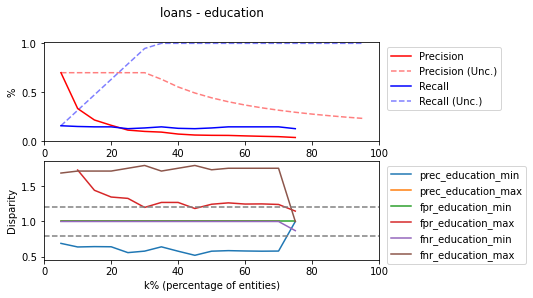

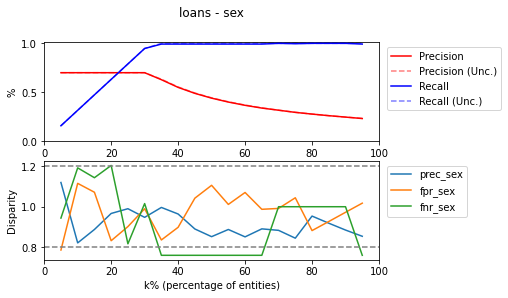

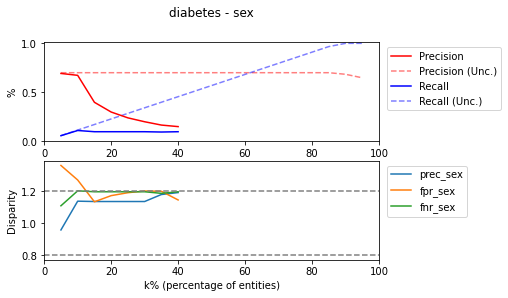

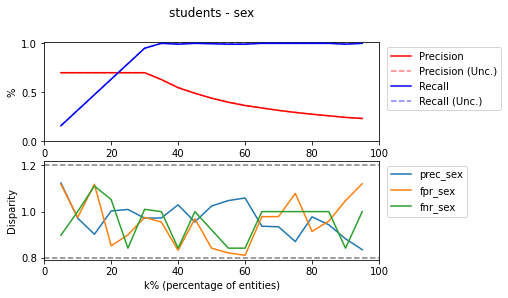

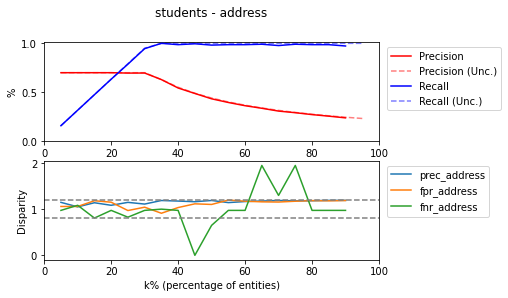

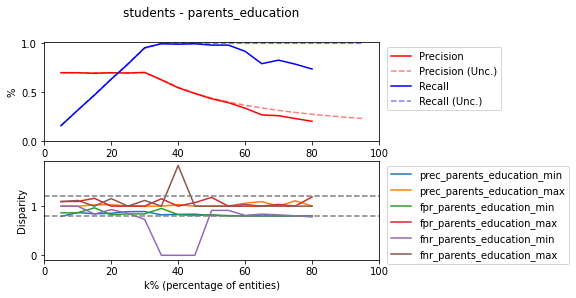

In [7]:
dfs = {
    "loans": loans_df.copy(),
    "diabetes": diabetes_df.copy(),
    "students": students_df.copy()
}

sensitive_attrs = {
    "loans": ['education','sex'],
    "diabetes": ['sex'],
    "students": ['sex','address','parents_education'],
}

sex_names = {0: "Male",
             1: "Female"}

results_columns = ['dataset','sample_size','overall_prev','sensitive_attr','group_dist','group_prev','max_group_prev_diff']
results_df = pd.DataFrame(
            columns=(results_columns)
)

fo_results = {}

def maxDiff(a):
    a.sort()
    vmin = a[0]
    dmax = 0
    for i in range(len(a)):
        if (a[i] < vmin):
            vmin = a[i]
        elif (a[i] - vmin > dmax):
            dmax = a[i] - vmin
    return dmax


# Mapping for Education
# 0: Other
# 1: High school
# 2: University or greater
education_names = {
    0: "Not high school or university or greater",
    1: "High school",
    2: "University or greater"
}

parents_education_names = {
    0: "Not high school or university or greater",
    1: "High school",
    2: "University or greater"
}

address_names = {
    0: "Urban",
    1: "Rural"
}

# Mapping for Sex
# 0: Male
# 1: Female
sex_names = {
    0: "Male",
    1: "Female"
}

for df in dfs.keys():
    # Dict for new record
    r = {}
    r['dataset'] = df

    if df != 'diabetes':
        # If not diabetes dataset, we have to down sample for Gurobi
        increase_test_size = True
        test_size = 0.01
        while increase_test_size:
            if dfs[df].shape[0]*test_size < 1000:
                test_size+=0.01
            else:
                increase_test_size = False
        statify_keys = (sensitive_attrs[df] + ['label_value'])
        _, sample_df = train_test_split(dfs[df], test_size=test_size, stratify=dfs[df][statify_keys],random_state=42)
        sample_df = sample_df.reset_index()
    else:
        sample_df = dfs[df]

    r['sample_size'] = sample_df.shape[0]
    r['overall_prev'] = round(sample_df['label_value'].value_counts(normalize=True)[1]*100, 2)

    for attr in sensitive_attrs[df]:
        print(f"DEBUG: Working on df={df}, attr={attr}")
        sample_df[str(attr+'_names')] = sample_df[attr].map(eval(attr + '_names'))

        # Get attr dist
        attr_dist_dict = {}
        attr_dist = sample_df[str(attr+'_names')].value_counts(normalize=True)
        for x in list(sample_df[str(attr+'_names')].unique()):
            attr_dist_dict[x] = round(attr_dist[x]*100,2)

        # Get attr prev
        attr_prev_dict = {}
        attr_prev = pd.crosstab(sample_df[str(attr+'_names')], sample_df['label_value'], normalize='index')
        for x in list(sample_df[str(attr+'_names')].unique()):
            attr_prev_dict[x] = round(attr_prev[1][x]*100,2)

        attr_max_prev_diff = round(maxDiff(list(attr_prev_dict.values())),2)

        r['sensitive_attr'] = attr
        r['group_dist'] = attr_dist_dict
        r['group_prev'] = attr_prev_dict
        r['max_group_prev_diff'] = attr_max_prev_diff

        results_df = results_df.append(r, ignore_index=True)

        fo = FairnessEvaluator(sample_df,
                              'label_value',
                              [attr],
                              metrics=['tpr','fpr','fnr'],
                              metrics_to_plot=['prec','fpr','fnr'],
                              fairness_bounds=[0.8,1.2],
                              fully_constrained=False,
                              precision_ub = 0.7#,
                              #disparity_ratio=True,
                              #epsilon=0.05
                              )

        fo.evaluate()
        fo.plot()
        plt.title(f'{df} - {attr}', y=2.4)

        key_temp = f'{df}_{attr}'
        fo_results[key_temp] = fo.results_df


In [8]:
fo_results['diabetes_sex'].filter(items=['k_perc','group_confusion_matrix'])

,k_perc,group_confusion_matrix
0,5,"{0: {'tn': 192, 'fp': 8, 'fn': 302, 'tp': 18},..."
1,10,"{0: {'tn': 183, 'fp': 17, 'fn': 285, 'tp': 35}..."
2,15,"{0: {'tn': 153, 'fp': 47, 'fn': 289, 'tp': 31}..."
3,20,"{0: {'tn': 127, 'fp': 73, 'fn': 289, 'tp': 31}..."
4,25,"{0: {'tn': 101, 'fp': 99, 'fn': 289, 'tp': 31}..."
5,30,"{0: {'tn': 75, 'fp': 125, 'fn': 289, 'tp': 31}..."
6,35,"{0: {'tn': 48, 'fp': 152, 'fn': 290, 'tp': 30}..."
7,40,"{0: {'tn': 23, 'fp': 177, 'fn': 289, 'tp': 31}..."
8,45.0,NaN
9,50.0,NaN


In [ ]:
#results_df['prev_ratio'] = results_df.apply(lambda row: (row['max_group_prev_diff'] / row['overall_prev']), axis=1)
results_df

,dataset,sample_size,overall_prev,sensitive_attr,group_dist,group_prev,max_group_prev_diff
0,loans,1200,22.17,education,"{'High school': 16.42, 'University or greater'...","{'High school': 25.38, 'University or greater'...",14.85
1,loans,1200,22.17,sex,"{'Female': 60.33, 'Male': 39.67}","{'Female': 20.86, 'Male': 24.16}",3.30
2,diabetes,520,61.54,sex,"{'Male': 63.08, 'Female': 36.92}","{'Male': 44.82, 'Female': 90.1}",45.28
3,students,1003,22.03,sex,"{'Female': 56.63, 'Male': 43.37}","{'Female': 21.13, 'Male': 23.22}",2.09
4,students,1003,22.03,address,"{'Rural': 27.42, 'Urban': 72.58}","{'Rural': 27.27, 'Urban': 20.05}",7.22
5,students,1003,22.03,parents_education,{'Not high school or university or greater': 4...,{'Not high school or university or greater': 2...,9.33


In [9]:
results_df.to_csv('results/students-loans-diabetes-results.csv',index=False)